In [257]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

Question 1

In [258]:
sd = pd.read_csv('strongdrink.txt')

In [259]:
sd[:10]

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


(a)

In [260]:
X = sd[['alco', 'malic', 'tot_phen', 'color_int']]
y = sd[['cultivar']]
# This function train_test_split is from sklearn.cross_validation
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.25,
random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
MultLogReg.fit(X_train, y_train)
y_pred = MultLogReg.predict(X_test)
print('Coefficients for j = 1 are :')
print('beta_0 = ', MultLogReg.intercept_[0])
print('beta_1 = ', MultLogReg.coef_[0][0])
print('beta_2 = ', MultLogReg.coef_[0][1])
print('beta_3 = ', MultLogReg.coef_[0][2])
print('beta_4 = ', MultLogReg.coef_[0][3])
print('Coefficients for j = 2 are :')
print('beta_0 = ', MultLogReg.intercept_[1])
print('beta_1 = ', MultLogReg.coef_[1][0])
print('beta_2 = ', MultLogReg.coef_[1][1])
print('beta_3 = ', MultLogReg.coef_[1][2])
print('beta_4 = ', MultLogReg.coef_[1][3])

Coefficients for j = 1 are :
beta_0 =  -24.0113348438
beta_1 =  1.70043278424
beta_2 =  -0.265609751916
beta_3 =  1.22389442443
beta_4 =  0.0227476853372
Coefficients for j = 2 are :
beta_0 =  22.8016831016
beta_1 =  -1.4679855391
beta_2 =  -0.333050955114
beta_3 =  0.664005927931
beta_4 =  -0.922708900255


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [261]:
sd.groupby(['cultivar']).count()

,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
cultivar,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,46,46,46,46,46,46,46,46,46,46,46,46,46


In [262]:
print(classification_report(y_test, y_pred))
print('The error rates for category 1 is', 1-0.87)
print('The error rates for category 2 is', 1-1.00)
print('The error rates for category 3 is', 1-1.00)

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

The error rates for category 1 is 0.13
The error rates for category 2 is 0.0
The error rates for category 3 is 0.0


Category 3 of cultivar is the model best at predicting, but it is not the most the one with the most observations. It has less observations than the other two categories.

(b)

In [263]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix
# Define loo as a leave-one-out object, then
# split it into N different partitions

# Note that the LeaveOneOut() function does not work
# well with pandas DataFrames
Xvars = sd.ix[:, (1, 2, 6, 10)].values
yvals = sd.ix[:, 0].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
test_and_pred = np.zeros([len(sd), 2])

# This loop will take 20 or 30 seconds
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec[test_index] = (y_test - y_pred) ** 2
    test_pred_entry = np.array([y_test, y_pred]).reshape((1,2))
    test_and_pred[test_index,:] = test_pred_entry

MSE_loo = MSE_vec.mean()
print('LOOCV estimate for the test MSE is', MSE_loo)
y_test_array = test_and_pred[:,0]
y_pred_array = test_and_pred[:,1]
print(classification_report(y_test_array, y_pred_array))
print('The error rates for category 1 is', 1-0.84)
print('The error rates for category 2 is', 1-0.83)
print('The error rates for category 3 is', 1-0.96)
print("The error rates are higher than those of part(a).")

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


LOOCV estimate for the test MSE is 0.1875
             precision    recall  f1-score   support

        1.0       0.84      0.78      0.81        59
        2.0       0.83      0.89      0.86        71
        3.0       0.96      0.93      0.95        46

avg / total       0.86      0.86      0.86       176

The error rates for category 1 is 0.16000000000000003
The error rates for category 2 is 0.17000000000000004
The error rates for category 3 is 0.040000000000000036
The error rates are higher than those of part(a).


(3)

In [264]:
from sklearn.model_selection import KFold
k = 4
kf = KFold(n_splits=3, shuffle=True, random_state=10)
kf.get_n_splits(X)

MSE_vec_kf = np.zeros(k)

k_ind = int(0)
test_and_pred_k = np.zeros([len(sd), 2])
for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1
    test_and_pred_k[test_index, 0] = y_test
    test_and_pred_k[test_index, 1] = y_pred


MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print(classification_report(test_and_pred_k[:,0], test_and_pred_k[:,1]))
print('The k-fold estimate for the test MSE is', MSE_kf)
print('The error rates for category 1 is', 1-0.81)
print('The error rates for category 2 is', 1-0.81)
print('The error rates for category 3 is', 1-0.96)
print("The error rates are higher than those of part(a) and (b).")

k index= 0
MSE for test set 0  is 0.28813559322
k index= 1
MSE for test set 1  is 0.271186440678
k index= 2
MSE for test set 2  is 0.051724137931
             precision    recall  f1-score   support

        1.0       0.81      0.75      0.78        59
        2.0       0.81      0.87      0.84        71
        3.0       0.96      0.93      0.95        46

avg / total       0.85      0.85      0.85       176

The k-fold estimate for the test MSE is 0.152761542957
The error rates for category 1 is 0.18999999999999995
The error rates for category 2 is 0.18999999999999995
The error rates for category 3 is 0.040000000000000036
The error rates are higher than those of part(a) and (b).


Question 2

(a)

In [265]:
ci = pd.read_csv('CoolIndex.txt', names=['Age', 'Cool Index'])

In [266]:
ci[:10]

,Age,Cool Index
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918
5,11.0,9.882644
6,11.0,9.658151
7,11.0,10.643767
8,11.0,9.975599
9,11.0,8.570520


<IPython.core.display.Javascript object>


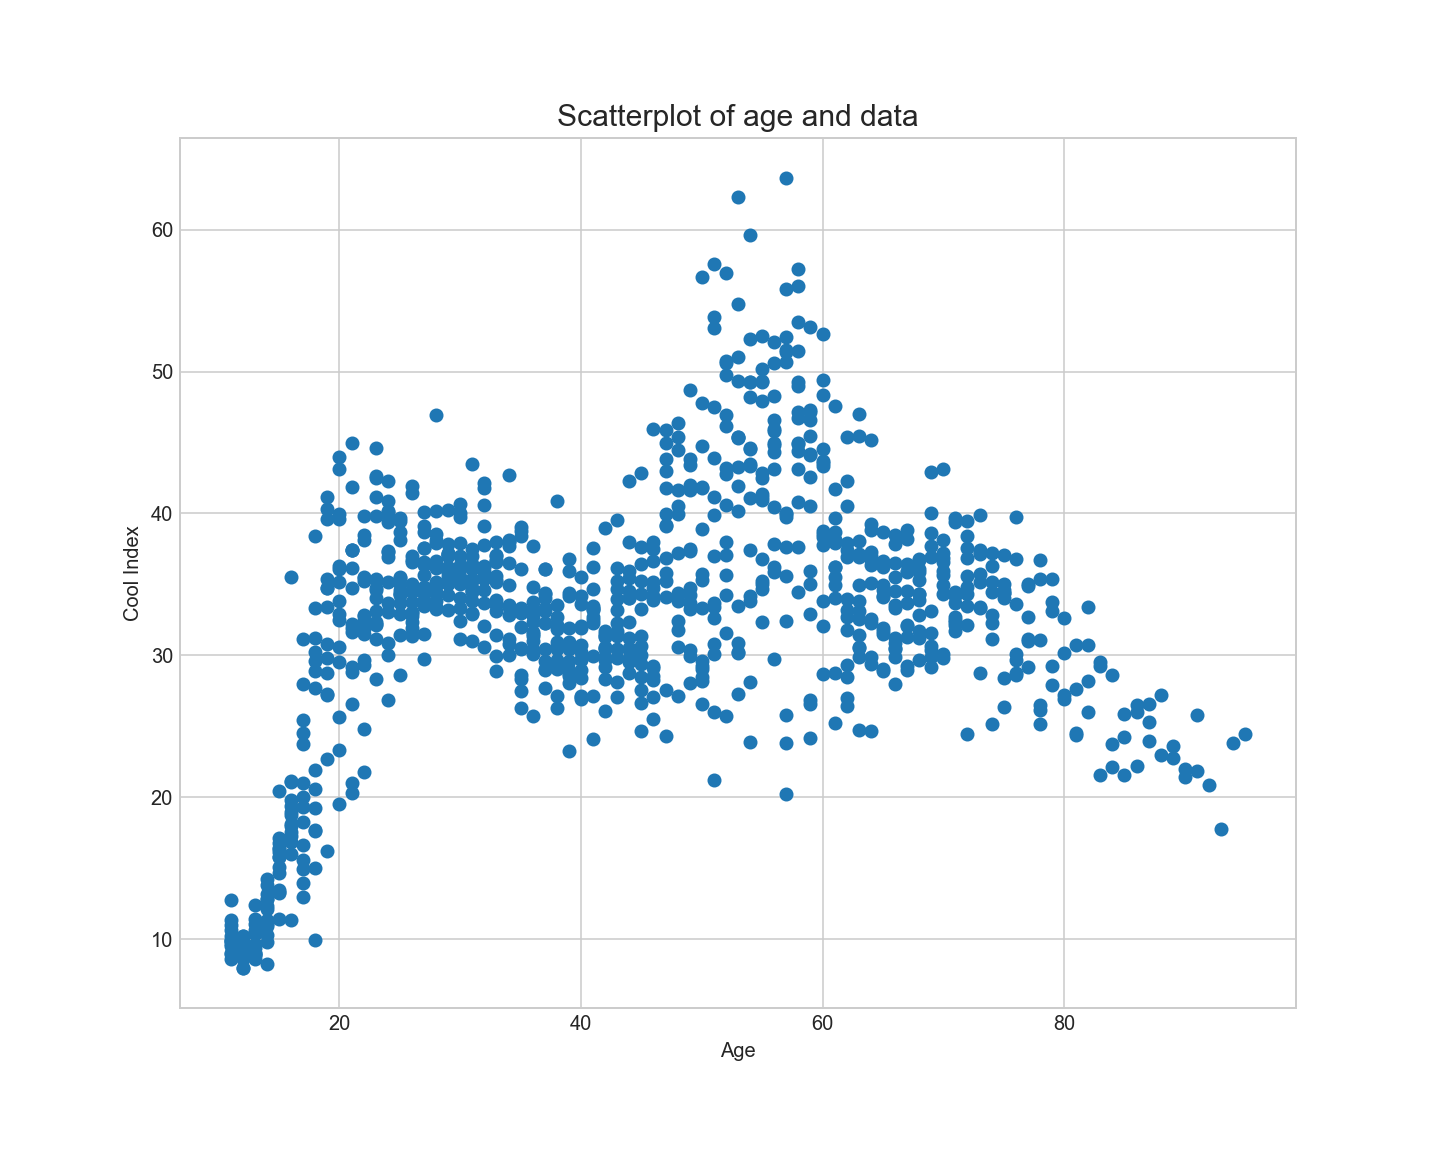

Text(0,0.5,'Cool Index')

In [267]:
%matplotlib notebook
plt.scatter(ci['Age'], ci['Cool Index'])
plt.title('Scatterplot of age and data', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Cool Index')

In [268]:
import statsmodels.api as sm
coolindex = ci['Cool Index']
age = ci['Age']
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()
reg2 = sm.OLS(endog=coolindex, exog=X_step, missing='drop')
reg2_results = reg2.fit()
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:             Cool Index   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Sun, 18 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:41:16   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.566     35.522      0.0

<IPython.core.display.Javascript object>


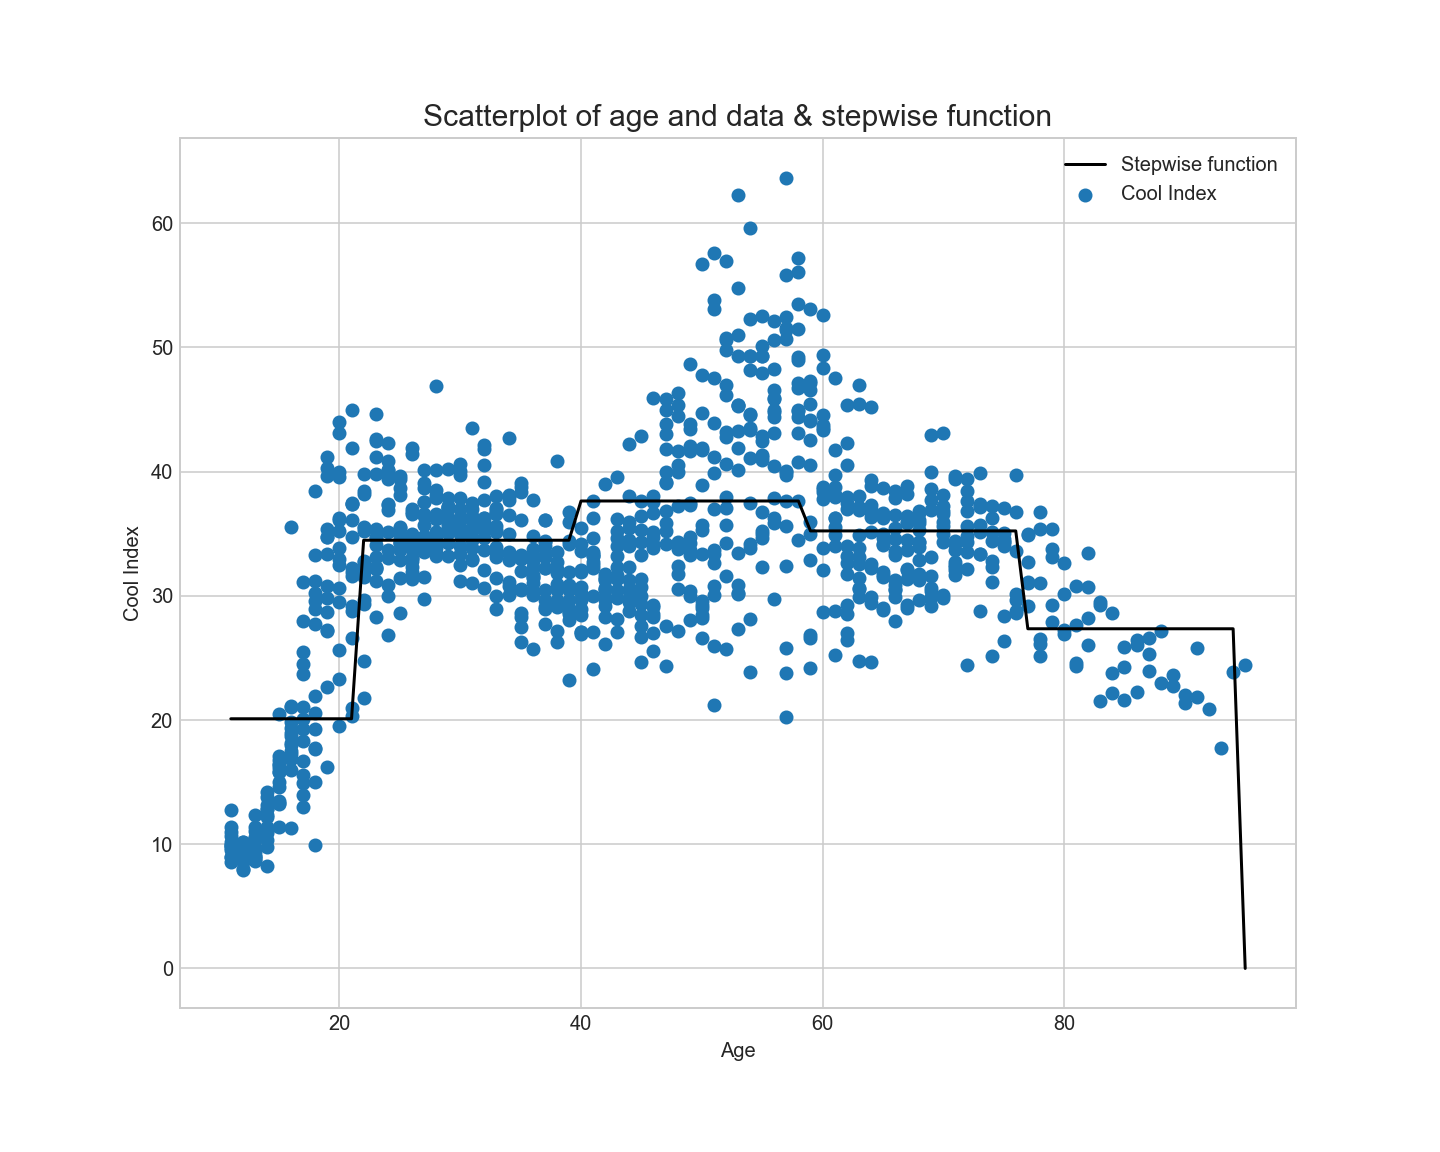

Text(0,0.5,'Cool Index')

In [269]:
%matplotlib notebook
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
y_pred_b = reg2_results.predict(X_step)
plt.scatter(ci['Age'], ci['Cool Index'])
plt.plot(age, y_pred_b, color = 'k',label='Stepwise function')
plt.legend(loc='upper right')
plt.title('Scatterplot of age and data & stepwise function', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Cool Index') 

Beta_1 is 20.1025  
Beta_2 is 34.4758  
Beta_3 is 37.6351  
Beta_4 is 35.2254  
Beta_5 is 27.3482   

The predicted coolness of a 73-year old is 35.2254

(c)

<IPython.core.display.Javascript object>


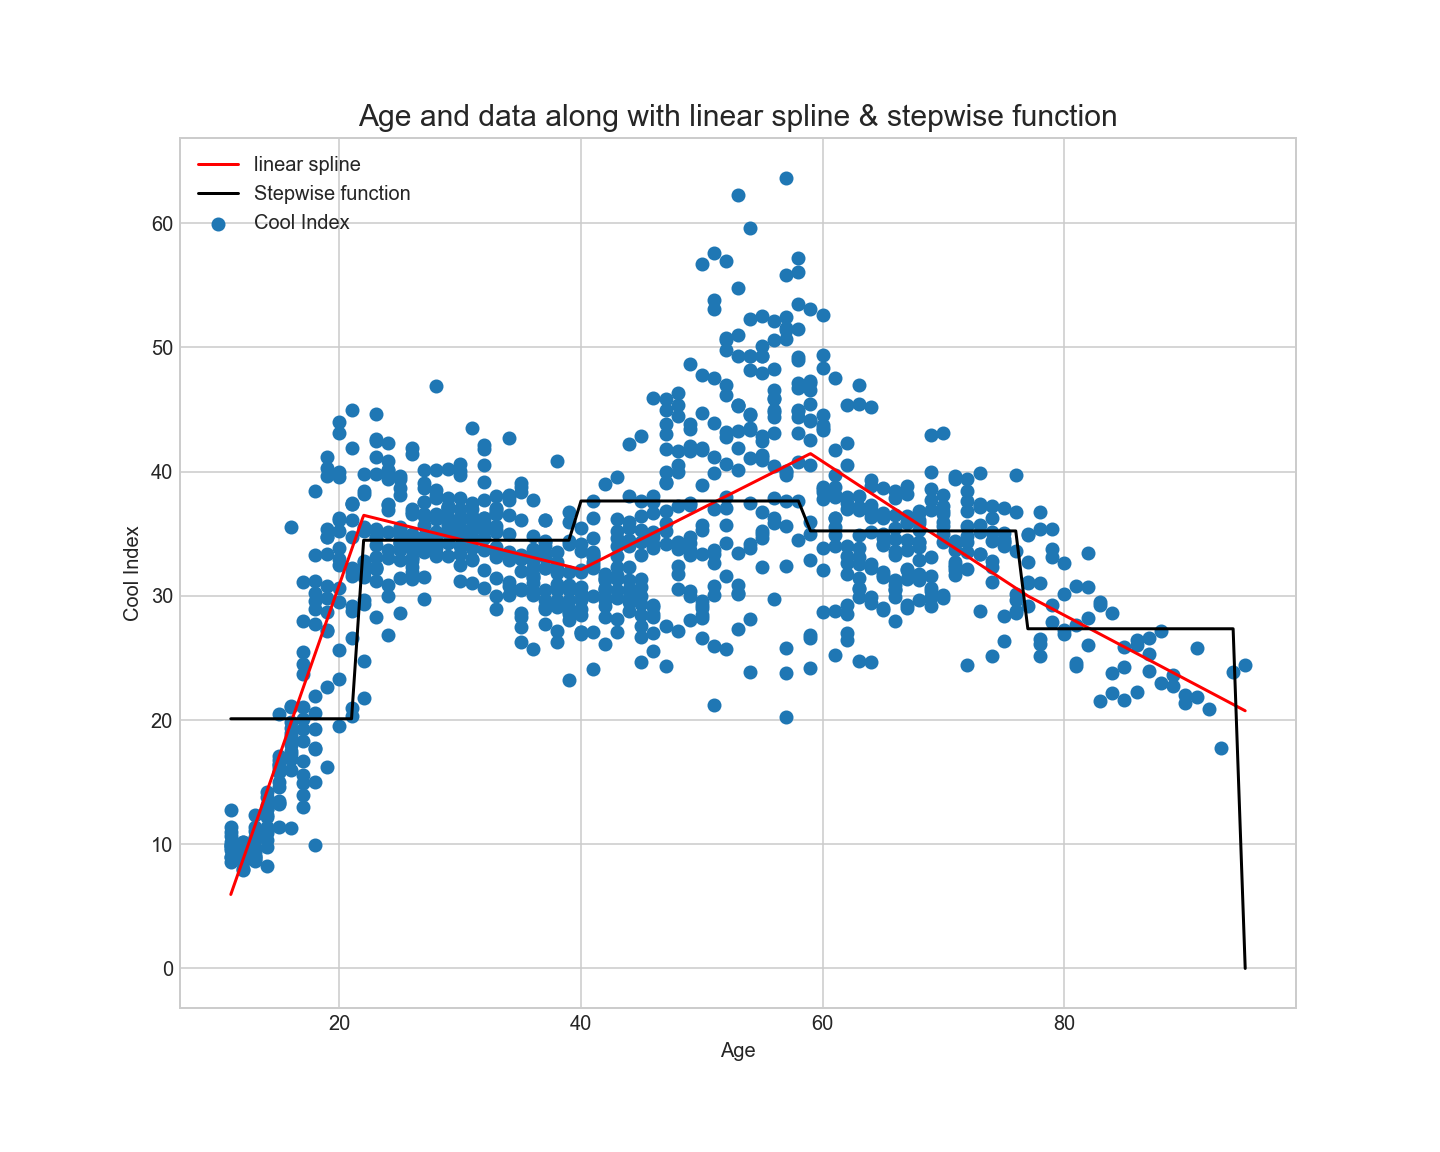

Text(0,0.5,'Cool Index')

In [270]:
from scipy.interpolate import LSQUnivariateSpline
knots = [22,40,59,77]
spl_cool = LSQUnivariateSpline(age.values, coolindex.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.scatter(age, coolindex)
plt.plot(age_vec, spl_cool(age_vec), 'r-', label='linear spline')
plt.plot(age, y_pred_b, color = 'k',label='Stepwise function')
plt.legend(loc='upper left')
plt.title('Age and data along with linear spline & stepwise function', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Cool Index')

In [271]:
ages_for_predict = np.array([73])
predicted_cool = spl_cool(ages_for_predict)
print('Age =', ages_for_predict[0])
print('Predicted Coolness for 73 year old =', predicted_cool[0])

Age = 73
Predicted Coolness for 73 year old = 32.5368323891


(d)

<IPython.core.display.Javascript object>


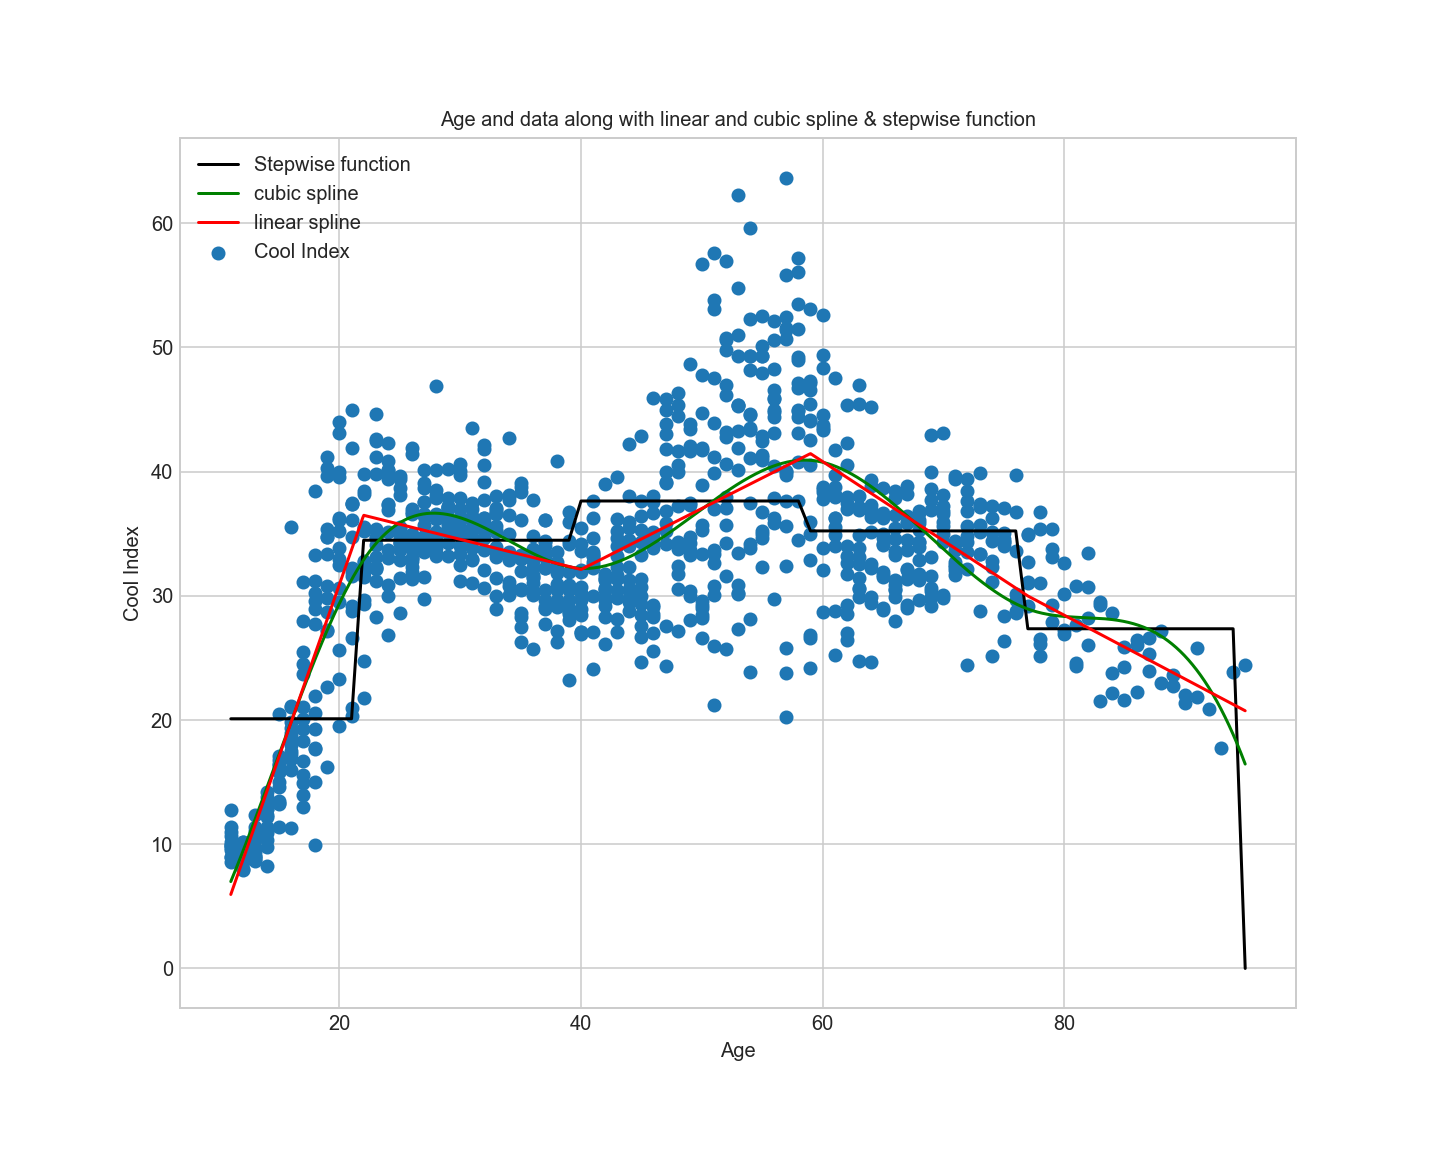

Text(0,0.5,'Cool Index')

In [272]:
knots2 = [22,40,59,77]
spl_cool2 = LSQUnivariateSpline(age.values, coolindex.values, knots2, k=3)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.scatter(age, coolindex)
plt.plot(age, y_pred_b, color = 'k',label='Stepwise function')
plt.plot(age_vec, spl_cool2(age_vec), 'g', label='cubic spline')
plt.plot(age_vec, spl_cool(age_vec), 'r-', label='linear spline')
plt.legend(loc='upper left')
plt.title('Age and data along with linear and cubic spline & stepwise function', fontsize=10)
plt.xlabel('Age')
plt.ylabel('Cool Index')

In [273]:
ages_for_predict = np.array([73])
predicted_cool2 = spl_cool2(ages_for_predict)
print('Age =', ages_for_predict[0])
print('Predicted Coolness for 73 year old =', predicted_cool2[0])

Age = 73
Predicted Coolness for 73 year old = 31.2624293893
